# Final Project: E-Commerce Public Data Analysis

## Introduction
- Name: Kent Cristopher
- Email: kent.christopher03@gmail.com
- ID Dicoding: kent_cristopher_SbJw

## Defining Business Problem Statement
1. What are the best and least selling products?
2. Where do most customers come from?
3. How are customer satifaction?
4. How much does the average customer spend in each state?

## Preparing Library Requirements

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
from scipy import stats

## 1. Data Wrangling

### 1.1 Gathering Data

In [4]:
# Write the data directory for reusability purposes
data_dir = 'data/' # You should modify this to where you store your data!

# Initializing data frames from datasets
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')
items = pd.read_csv(data_dir + 'order_items_dataset.csv')
payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')

In [5]:
# Store all data frames into a dictionary to enable looping and keep tidy!
data_dict = {
    'customers': customers,
    'geolocation': geolocation,
    'items': items,
    'payments': payments,
    'reviews': reviews,
    'orders': orders,
    'category': category,
    'products': products,
    'sellers': sellers
} # Should be accessed as data_dict[data_frame][column][row]

In [6]:
data_dict['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
data_dict['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
data_dict['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
data_dict['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
data_dict['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
data_dict['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
data_dict['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
data_dict['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [14]:
data_dict['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### 1.2 Assessing Data

#### 1.2.1 Checking Data Types

In [15]:
for df_name, df in data_dict.items():
    print(f"Information of {df_name}.info()")
    data_dict[df_name].info()
    print()

Information of customers.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Information of geolocation.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non

#### 1.2.2 Checking Missing Values (NaN)

In [16]:
# Initialize a dictionary to store null value counts for every data frame in data_dict
null_counts = {}

# Access every data frames in data_dict using loop
for df_name, df in data_dict.items():
    null_counts[df_name] = df.isna().sum()
    print(f'Null counts of {df_name}')
    print(null_counts[df_name], end='\n\n')

Null counts of customers
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Null counts of geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Null counts of items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Null counts of payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Null counts of reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review

We can see the null values are quite ambiguous. If we drop them, we wouldn't know how much % of the entire data is lost. **With this in mind, we should check the Missing Value(%)**

In [17]:
# Initialize a dictionary to store null value counts for every data frame in data_dict
null_counts = {}

# Access every data frames in data_dict using loop
for df_name, df in data_dict.items():
    null_counts[df_name] = df.isna().mean()
    print(f'Null counts of {df_name}(%)')
    print(null_counts[df_name], end='\n\n')

Null counts of customers(%)
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

Null counts of geolocation(%)
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

Null counts of items(%)
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

Null counts of payments(%)
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

Null counts of reviews(%)
review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.

**Now we can see more clearly the impact of missing values in these data frames!**
1. Reviews have an 88% and 59% missing values. These should be investigated more before taking final action!
2. Most missing values in the rest of data frames can be dropped without losing much information. **(less than 2%)**

#### 1.2.3 Checking Duplicate Counts

In [18]:
# Making this a function for reusability purposes 
def check_all_duplicates():
    # Initialize a dictionary to store duplicate counts and total sample counts for every data frames
    duplicate_counts = {}
    total_sample = {}

    # Access every data frames in data_dict using loop
    for df_name, df in data_dict.items():
        duplicate_counts[df_name] = df.duplicated().sum()
        total_sample[df_name] = len(df)  # len(df) returns number of entries along the 1 axis, which is the rows!

    # Create DataFrames from the dictionaries
    duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
    total_sample_df = pd.DataFrame.from_dict(total_sample, orient='index', columns=['Total Sample '])

    # Combine the two DataFrames by concatenating them horizontally
    result = pd.concat([total_sample_df, duplicate_counts_df], axis=1)
    return result

check_all_duplicates()

,Total Sample,Duplicate Count
customers,99441,0
geolocation,1000163,261831
items,112650,0
payments,103886,0
reviews,99224,0
orders,99441,0
category,71,0
products,32951,0
sellers,3095,0


In [19]:
data_dict['geolocation'].duplicated().sum()

np.int64(261831)

We can see here there are no duplicates aside of geolocation. What does this mean? This probably means that there are multiple entries within the same location. **(Multiple orders from the exact same geolocation; abnormal)**

### 1.3 Cleaning Data

**We will only be cleaning data that are:**
1. Is a missing value, **considered is fine dropping**
2. Is a duplicate, **considered is fine dropping**

#### 1.3.1 Cleaning Missing Values

We will first start with the `orders` since it is out primary list aside from `customers` and `products`.

This will be the most important data frame in this analysis since everything is interconnected with a key in this specific data frame, `order_id`.

For this analysis, we will only select valid orders that are already delivered. Since this is considered a valid decision since **normally training a model only requires historical data.**

In [20]:
print(data_dict['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


Let's check if this decision makes a huge impact on the information we are going to process:

In [21]:
data_remain = round(data_dict['orders'].order_status.value_counts()['delivered'] / len(data_dict['orders']) * 100, 2)

print(f"Taking only the \"delivered\" orders we still get {data_remain}% of data. Meaning we will only lose about {100 - data_remain:.2f}% of our total information!")


Taking only the "delivered" orders we still get 97.02% of data. Meaning we will only lose about 2.98% of our total information!


In [22]:
# Get all order_ids where the order status was not 'delivered'
not_delivered = data_dict['orders'].loc[data_dict['orders']['order_status'] != 'delivered', 'order_id']

# Drop rows with the order_id in the 'not_delivered' list,
# Meaning we only want to keep only the 'delivered' order status.
for df_name, df in data_dict.items():
    if 'order_id' in df.columns:
        df.drop(df[df['order_id'].isin(not_delivered)].index, inplace=True)


In [23]:
data_dict['orders']['order_status'].unique()

array(['delivered'], dtype=object)

For now, we need to search for rows in our data dictionary that contains missing values.

In [24]:
# Made this a function for reusability purposes (checking)
def check_all_missing_values():
    for df_name, df in data_dict.items():
        for col in df.columns:
            if df[col].isnull().sum():
                print(f'{col:>30}: {round((sum(df[col].isnull())/len(df))*100,2):5} %')

check_all_missing_values()

          review_comment_title: 88.37 %
        review_comment_message: 59.42 %
             order_approved_at:  0.01 %
  order_delivered_carrier_date:   0.0 %
 order_delivered_customer_date:  0.01 %
         product_category_name:  1.85 %
           product_name_lenght:  1.85 %
    product_description_lenght:  1.85 %
            product_photos_qty:  1.85 %
              product_weight_g:  0.01 %
             product_length_cm:  0.01 %
             product_height_cm:  0.01 %
              product_width_cm:  0.01 %


Again, huge number in `review_comment_title` and `review_comment_message`. Let's just assume that they only give rating 0-5 and decide not to write any comments.

Now, that doesn't really matter. Let's check on `orders`:

In [25]:
data_dict['orders'].isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

As you can see, there is some missing dates even though it is delivered. We should drop this.

**BUT REMEMBER, THIS `orders` DATA FRAME IS INTERLINKED WITH ALL THE DATA FRAMES.** Which means we should also drop entries that have the same `order_id` as the ones containing missing values in `orders`.

In [26]:
# This list returns order_id of missing deliveries.
missing_deliveries = data_dict['orders'].loc[
    data_dict['orders']['order_delivered_customer_date'].isnull() | 
    data_dict['orders']['order_delivered_carrier_date'].isnull(), 
    'order_id'
]

# This loop looks for every entries in data dictionary that has the same order_id as in
# missing_deliveries and drops them. This way, we wont get any abnormalities.
for df_name, df in data_dict.items():
    if 'order_id' in df.columns:
        df.drop(df[df['order_id'].isin(missing_deliveries)].index, inplace=True)

In [27]:
# Initialize a dictionary to store null value counts for every data frame in data_dict
null_counts = {}

# Access every data frames in data_dict using loop
for df_name, df in data_dict.items():
    null_counts[df_name] = df.isna().sum()
    print(f'Null counts of {df_name}')
    print(null_counts[df_name], end='\n\n')

Null counts of customers
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Null counts of geolocation
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Null counts of items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Null counts of payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Null counts of reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       85148
review_comment_message     57258
review_creation_date           0
review

You can compare this Null Counting with the previous one to see entries being dropped not only on the orders data frame.

Now since using the full comparison of dates is not really effective for out Business Problem Statement. We want to extract information by making it simpler, using 'On-time' and 'Late' as an indicator of yes or no to the question **'Does delivery time affects anything?'.**

In [28]:
# Add a new feature delivery_status by comparing date delivered and estimated
data_dict['orders']['delivery_status'] = np.where(
    data_dict['orders']['order_delivered_customer_date'] < data_dict['orders']['order_estimated_delivery_date'], 
    'On Time', 
    'Late'
)


In [29]:
data_dict['orders'].nunique()

order_id                         96469
customer_id                      96469
order_status                         1
order_purchase_timestamp         95947
order_approved_at                88266
order_delivered_carrier_date     80106
order_delivered_customer_date    95657
order_estimated_delivery_date      445
delivery_status                      2
dtype: int64

Now after this, we are going to remove all the other missing values starting from Reviews since we need to remove two entire feature!

In [30]:
data_dict['reviews'].columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [31]:
data_dict['reviews'].drop(columns=['review_comment_title',
                                   'review_comment_message'], inplace=True)

In [32]:
data_dict['reviews'].columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

Done! Now we are going to drop other missing values from products!

In [33]:
check_all_missing_values()

             order_approved_at:  0.01 %
         product_category_name:  1.85 %
           product_name_lenght:  1.85 %
    product_description_lenght:  1.85 %
            product_photos_qty:  1.85 %
              product_weight_g:  0.01 %
             product_length_cm:  0.01 %
             product_height_cm:  0.01 %
              product_width_cm:  0.01 %


Most of these features doesn't answer our Business Problem Statement, so might as well to drop the feature!

In [34]:
drop_cols = [
    'product_name_lenght',
    'product_description_lenght',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm'
]

data_dict['products'].drop(drop_cols, axis=1, inplace=True)

Now for these two features with missing values is quite useful:
1. product_category_name: Brazilian (Portuguese) name for the products **(IMPORTANT!)**
2. product_photos_qty: Number of photos a product has

In [35]:
# Just replace missing values in product category as others or unknown in Portuguese
# since there is no 'others' in product_categories_name_translation
data_dict['products']['product_category_name'].fillna(value='outros', inplace=True)

C:\Users\Keny\AppData\Local\Temp\ipykernel_1372\3496992457.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_dict['products']['product_category_name'].fillna(value='outros', inplace=True)


In [36]:
is_zero_photos = (data_dict['products']['product_photos_qty'] == 0).sum()
print(f'There are {is_zero_photos} in product_photos_qty with zero photos.')

There are 0 in product_photos_qty with zero photos.


In [37]:
# Since there are no zero quantity of photos in any entry, let's assume
# missing values as 0.
data_dict['products']['product_photos_qty'].fillna(0)

0        1.0
1        1.0
2        1.0
3        1.0
4        4.0
        ... 
32946    2.0
32947    1.0
32948    1.0
32949    2.0
32950    1.0
Name: product_photos_qty, Length: 32951, dtype: float64

#### 1.3.2 Cleaning Duplicates

We will just remove the abnormal duplicates from geolocation data frame.

In [38]:
data_dict['geolocation'].drop_duplicates(inplace=True)

In [39]:
check_all_duplicates()

,Total Sample,Duplicate Count
customers,99441,0
geolocation,738332,0
items,110188,0
payments,100747,0
reviews,96352,0
orders,96469,0
category,71,0
products,32951,0
sellers,3095,0


## 2. Exploratory Data Analysis (EDA)

We will do some experimenting in this section! To explore and make conclusions based from data and make a single .csv file from this multiple datasets without losing many information.

### 2.1 Exploring `customers`

In [40]:
data_dict['customers'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
41111,beef567db073a74452c5ea8c1d763632,4131dcbf66c415fb6efa9f4878749bd2,13040,campinas,SP
40857,ce10eba206282d64135a408029e09872,f5810f067e52b2c6e4f472138f3ca3d8,9090,santo andre,SP
18076,9ea898ab4b97ee77a6694ebcdcb1e3c3,c9f3b05dea60c33b97802a3b201246de,35519,nova serrana,MG
43071,cf0e80779e12f785cf99cb6cafba8e3d,108e63f3c5e4e864bde7ff1916f5e92a,22461,rio de janeiro,RJ
32886,93d82c58a8f2b0d2db80f16867b99edd,40774d861c6ca4cc0139739a04d930a8,13010,campinas,SP


In [41]:
data_dict['customers'].columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [42]:
data_dict['customers'].describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Assume `customer_id` is different each order (record identifier) since it is ambiguous, `customer_unique_id` should be customer identifier.

In [43]:
data_dict['customers'].groupby(by='customer_city').customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
pedranopolis          1
pedrao                1
matias olimpio        1
pedras altas          1
capela nova           1
Name: customer_unique_id, Length: 4119, dtype: int64

**Most of or customers are from sao paulo!**

In [44]:
data_dict['customers'].groupby(by='customer_state').customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

### 2.2 Exploring `orders`

In [45]:
data_dict['orders'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status
78697,cd833669dc6a68cd473eac313fe69a6c,bc4ecd6bee226a3064e6f48f3a67be1f,delivered,2017-07-08 13:05:29,2017-07-08 13:15:21,2017-07-13 18:04:28,2017-07-26 10:17:44,2017-08-16 00:00:00,On Time
48130,7ebf85bfac2ce83f0e584e02a6f225b4,db0e1df144d773611064d46bb16e33b1,delivered,2017-05-06 11:33:11,2017-05-09 09:50:14,2017-05-10 11:58:09,2017-05-16 12:44:55,2017-06-02 00:00:00,On Time
42909,d5027313478d5f0f54b719e6f96d095f,44b6e4637c442ca2e33a5fc2b9b7a339,delivered,2017-09-27 10:03:01,2017-09-27 10:14:22,2017-09-29 16:58:49,2017-10-03 20:43:40,2017-10-19 00:00:00,On Time
61453,660cb47a0b4b671c86901a47f7dbc91c,16faeb522c87bb758b216abeee3cf4a2,delivered,2018-03-12 14:04:19,2018-03-12 14:15:40,2018-03-14 00:14:49,2018-03-28 20:03:15,2018-04-03 00:00:00,On Time
13289,15c371c7aa7f65f363f03818e30090ad,bdff986fd1c3b55217d54d9cee4b49d2,delivered,2017-11-25 20:15:32,2017-11-25 20:34:42,2017-11-27 22:32:50,2017-12-29 16:39:54,2017-12-26 00:00:00,Late


In [46]:
data_dict['orders'].columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_status'],
      dtype='object')

In [47]:
data_dict['orders'].describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_status
count,96469,96469,96469,96469,96455,96469,96469,96469,96469
unique,96469,96469,1,95947,88266,80106,95657,445,2
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2017-11-20 11:46:30,2018-02-27 04:31:10,2018-05-09 15:48:00,2017-06-19 18:47:51,2017-12-20 00:00:00,On Time
freq,1,1,96469,3,9,47,3,507,88644


### 2.3 Exploring `payments`

In [48]:
data_dict['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80886,491208d141876b40c6381fa49e8dff6a,1,credit_card,1,106.78
37739,a762b5e99e0962bc51711998c7be8280,1,credit_card,7,84.16
93546,0ab4790a52443a30df72f298b03077db,1,credit_card,8,224.83
82948,072a8923b88a4247c16f4c0bca2f3177,1,boleto,1,37.27
15998,db54a9396f6a1b119b7f8e889d53030f,1,credit_card,3,197.75


In [49]:
data_dict['payments'].columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [50]:
data_dict['payments'].describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,100747,100747.000000,100747,100747.000000,100747.000000
unique,96468,NaN,4,NaN,NaN
top,ccf804e764ed5650cd8759557269dc13,NaN,credit_card,NaN,NaN
freq,26,NaN,74578,NaN,NaN
mean,NaN,1.088380,NaN,2.851658,153.065489
std,NaN,0.652757,NaN,2.684459,214.459664
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.780000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.290000


### 2.4 Exploring `items`

In [51]:
data_dict['items'].sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
109580,f911adf78cd1ef94a8412126ab558e81,2,28bc7d95951d962dd5cdda791e07b56f,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-04-10 21:09:17,39.97,15.23
84989,c11e4b7ceb73050e960f5b9ff6b75a72,1,554fc36c06624912230e7355ab7be734,1127b7f2594683f2510f1c2c834a486b,2017-08-16 11:30:14,41.31,17.63
12956,1d682037f2c5327f76a76a18f8053908,1,ac0bb4405e9661957160dd5ee9d5585c,dee656f0f566ed1aa85bd137c943f08f,2018-06-15 20:59:30,98.90,15.00
4729,0ab0adc81c98426d2cde86ab2ba52bc3,1,fd28b464cf1660a67606f7b48c8c38c6,5dceca129747e92ff8ef7a997dc4f8ca,2017-04-27 13:10:51,49.90,14.52
15872,24452cdc2a280a9404d38722fa017002,2,95b7ae3076a4c91f203a0c3dd9a54b57,670c26e0f1bf8d0576271d5cfaec6d2b,2018-02-22 11:35:31,59.80,16.86


In [52]:
data_dict['items'].columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [53]:
data_dict['items'].describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,110188,110188.000000,110188,110188,110188,110188.000000,110188.000000
unique,96469,NaN,32213,2970,91335,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,21,NaN,520,1996,21,NaN,NaN
mean,NaN,1.198198,NaN,NaN,NaN,119.977402,19.948914
std,NaN,0.706703,NaN,NaN,NaN,182.305355,15.698679
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.170000,21.150000


### 2.5 Exploring `sellers`

In [54]:
data_dict['sellers'].sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2697,1f1bb1f0859883505541bdd6606193e5,2124,sao paulo,SP
1953,2e1c9f22be269ef4643f826c9e650a52,4850,sao paulo,SP
2489,12c2ed9cded6138cf0c75f525f565fc7,11709,praia grande,SP
2078,0ed6ce5d87fd9c69eaacaeb778d67235,13473,americana,SP
2338,2a61c271b1ac763450d846849783e922,9175,santo andre,SP


In [55]:
data_dict['sellers'].columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [56]:
data_dict['sellers'].describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### 2.6 Exploring `products`

In [57]:
data_dict['products'].sample(5)

,product_id,product_category_name,product_photos_qty
30541,18c0b4a4150176a977ab587d549575e9,relogios_presentes,2.0
2755,180534717d1776626e418844a26a7c8f,relogios_presentes,1.0
23681,e5431fe7b289028ba2b453fafd45f0f8,moveis_sala,3.0
12772,6818237fc018fd5890c9095624a12182,fashion_bolsas_e_acessorios,4.0
21734,84b88b5f25e4651dbc4c1c9c7e4b7d27,cama_mesa_banho,1.0


In [58]:
data_dict['products'].columns

Index(['product_id', 'product_category_name', 'product_photos_qty'], dtype='object')

In [59]:
data_dict['products'].describe(include='all')

,product_id,product_category_name,product_photos_qty
count,32951,32951,32341.000000
unique,32951,74,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN
freq,1,3029,NaN
mean,NaN,NaN,2.188986
std,NaN,NaN,1.736766
min,NaN,NaN,1.000000
25%,NaN,NaN,1.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,3.000000


### 2.7 Exploring `category`

In [60]:
data_dict['category'].sample(5)

,product_category_name,product_category_name_english
15,telefonia_fixa,fixed_telephony
19,consoles_games,consoles_games
26,moveis_cozinha_area_de_servico_jantar_e_jardim,kitchen_dining_laundry_garden_furniture
50,fashion_underwear_e_moda_praia,fashion_underwear_beach
11,bebes,baby


In [61]:
data_dict['category'].columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [62]:
data_dict['category'].describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 2.8 Exploring `reviews`

In [63]:
data_dict['reviews'].sample(5)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
24006,33119752ecd6c5bbcfa4b56a1f4edbfc,6610d1b2f774539f028cc2850a795657,3,2017-09-09 00:00:00,2017-09-12 00:32:47
23142,618c95a0e7db3773941966cb5f8d0f11,eb35492173c3951dc20f437e0f5baf8e,5,2018-05-01 00:00:00,2018-05-02 13:09:23
11888,6da036905bd1d6513f0c9bfac88c0673,1f11f0ab2b0ec59d0ec45f7f810a04f8,1,2017-06-29 00:00:00,2017-07-02 02:33:41
83257,d17632341204e822215b5c2008827781,0dbd7242192102a62fc3677d4d42b5a1,5,2018-08-10 00:00:00,2018-08-11 23:42:50
11639,5cfe2b08b899d78d33a55aca644a06c5,55f33d1440ed529bf23f7b92248c149e,5,2017-08-12 00:00:00,2017-08-14 10:55:17


In [64]:
data_dict['category'].columns

Index(['product_category_name', 'product_category_name_english'], dtype='object')

In [65]:
data_dict['category'].describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### 2.9 Exploring `geolocation`

In [66]:
data_dict['geolocation'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
815755,76920,-10.719023,-62.266170,ouro preto do oeste,RO
193770,7951,-23.274964,-46.731849,francisco morato,SP
915041,88511,-27.837065,-50.316944,lages,SC
87988,4376,-23.653328,-46.656181,são paulo,SP
955395,93180,-29.696044,-51.243518,portao,RS


In [67]:
data_dict['geolocation'].columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [68]:
data_dict['geolocation'].describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


### 2.10 Exploring `merged_df`

Through all that, we can now make a `merged_df` through linking the data frames without any abnormalities. We do this by brainstorming the process and eyeballing the tables!

In [69]:
# Merge customers and orders to make sure every orders have a customer
customers_orders_df = pd.merge(
    left=data_dict['customers'],
    right=data_dict['orders'],
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

In [70]:
customers_orders_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_status'],
      dtype='object')

In [71]:
# Merge payments and reviews to make sure every payments requires a rating to be valid
payments_reviews_df = pd.merge(
    left=data_dict['payments'],
    right=data_dict['reviews'],
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [72]:
payments_reviews_df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [73]:
# Merge sellers and items to make sure every item is related to the seller
items_sellers_df = pd.merge(
    left=data_dict['items'],
    right=data_dict['sellers'],
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

In [74]:
items_sellers_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [75]:
# Merge products and categories to make sure all product have its category
products_categories_df = pd.merge(
    left=data_dict['products'],
    right=data_dict['category'],
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [76]:
products_categories_df.columns

Index(['product_id', 'product_category_name', 'product_photos_qty',
       'product_category_name_english'],
      dtype='object')

Now we can link these data frames together to get two final data frames.

In [77]:
# Merge customers_orders_df with payment_reviews_df on order_id,
# this completes the necessity process a customer has to go through
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [78]:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_status',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [79]:
# Merge items_sellers_df with products_categories_df on product_id,
# this completes the necessity process a seller has to go through
sellers_df = pd.merge(
    left=items_sellers_df,
    right=products_categories_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

In [80]:
sellers_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_photos_qty',
       'product_category_name_english'],
      dtype='object')

Now we can make the `merged_df` using both `costumers_df` and `sellers_df`

In [81]:
merged_df = pd.merge(
    left=customers_df,
    right=sellers_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [82]:
merged_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'delivery_status',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_category_name', 'product_photos_qty',
       'product_category_name_english'],
      dtype='object')

We won't be needing geolocation dataset, this is because it's information won't be needed since we already have `customer_city`, `customer_zip_code_prefix`, and `customer_state`. 

In [83]:
output_path_for_csv = 'data/merged/merged_df.csv'

merged_df.to_csv(output_path_for_csv, index=False)

## 3. Visualization and Explanatory Analysis

### 1. What products sells the most and the least?

In [84]:
sum_items_orders_df = (
    merged_df.groupby('product_category_name_english')['product_id']
    .count()
    .reset_index()
    .rename(columns={'product_category_name_english': 'category', 'product_id': 'items_sold'})
    .sort_values(by='items_sold', ascending=False)
)

sum_items_orders_df.head(10)


,category,items_sold
7,bed_bath_table,11814
43,health_beauty,9816
65,sports_leisure,8790
39,furniture_decor,8642
15,computers_accessories,7962
49,housewares,7196
70,watches_gifts,6075
68,telephony,4607
42,garden_tools,4480
5,auto,4301


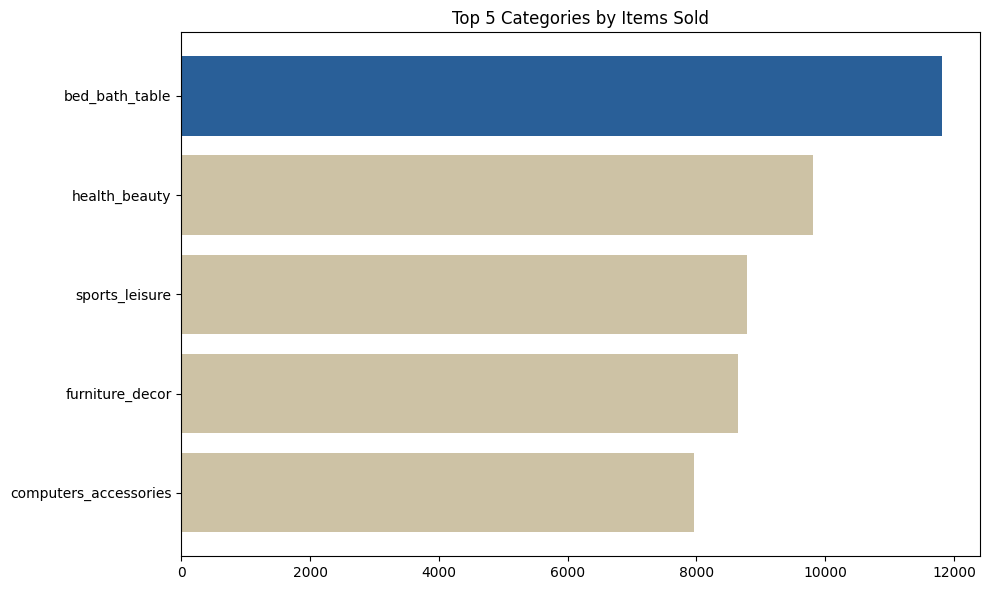

In [85]:
# Plotting the data
colors = ["#295F98", "#CDC2A5", "#CDC2A5", "#CDC2A5", "#CDC2A5"]

plt.figure(figsize=(10, 6))
plt.barh(sum_items_orders_df['category'].head(5), sum_items_orders_df['items_sold'].head(5), color=colors)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Top 5 Categories by Items Sold')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

plt.show()


> **We can see the top 5 item category that sells the most are:**
> 1. `bed_bath_table`
> 2. `health_beauty`
> 3. `sports_leisure`
> 4. `furniture_decor`
> 5. `computers_accessories`  

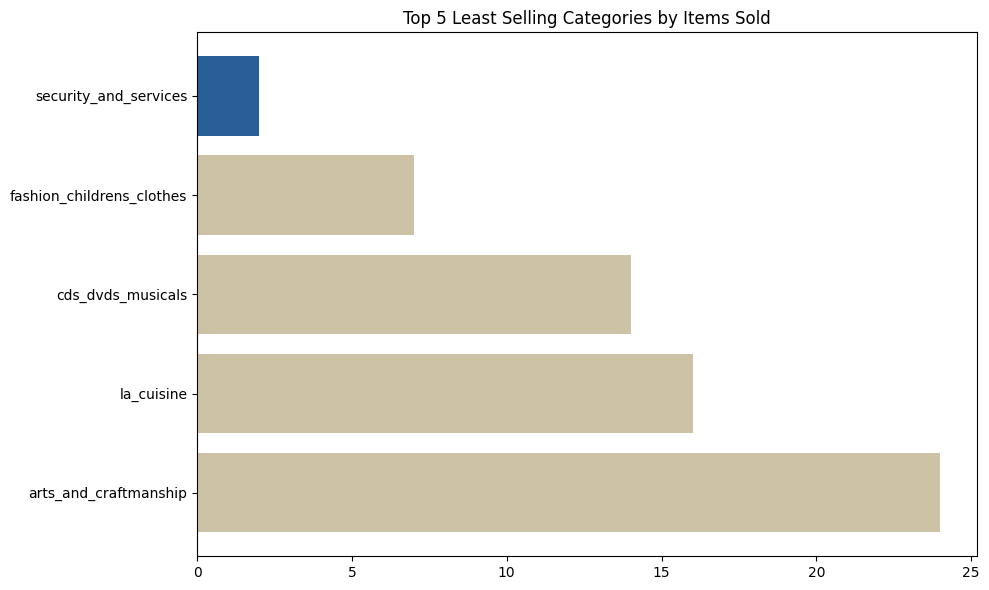

In [86]:
# Plotting the data for top 5 least selling
colors = ["#295F98", "#CDC2A5", "#CDC2A5", "#CDC2A5", "#CDC2A5"]

plt.figure(figsize=(10, 6))
# Sort data by 'items_sold' in ascending order and select the top 5 least selling
plt.barh(sum_items_orders_df.sort_values(by='items_sold', ascending=True)['category'].head(5), 
         sum_items_orders_df.sort_values(by='items_sold', ascending=True)['items_sold'].head(5), 
         color=colors)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Top 5 Least Selling Categories by Items Sold')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

plt.show()


> **We can see the top 5 item categories that sells the least are:**
> 1. `security_and_services`
> 2. `fashion_childrens_clothes`
> 3. `cds_dvds_musicals`
> 4. `la_cuisine`
> 5. `arts_and_craftmanship`

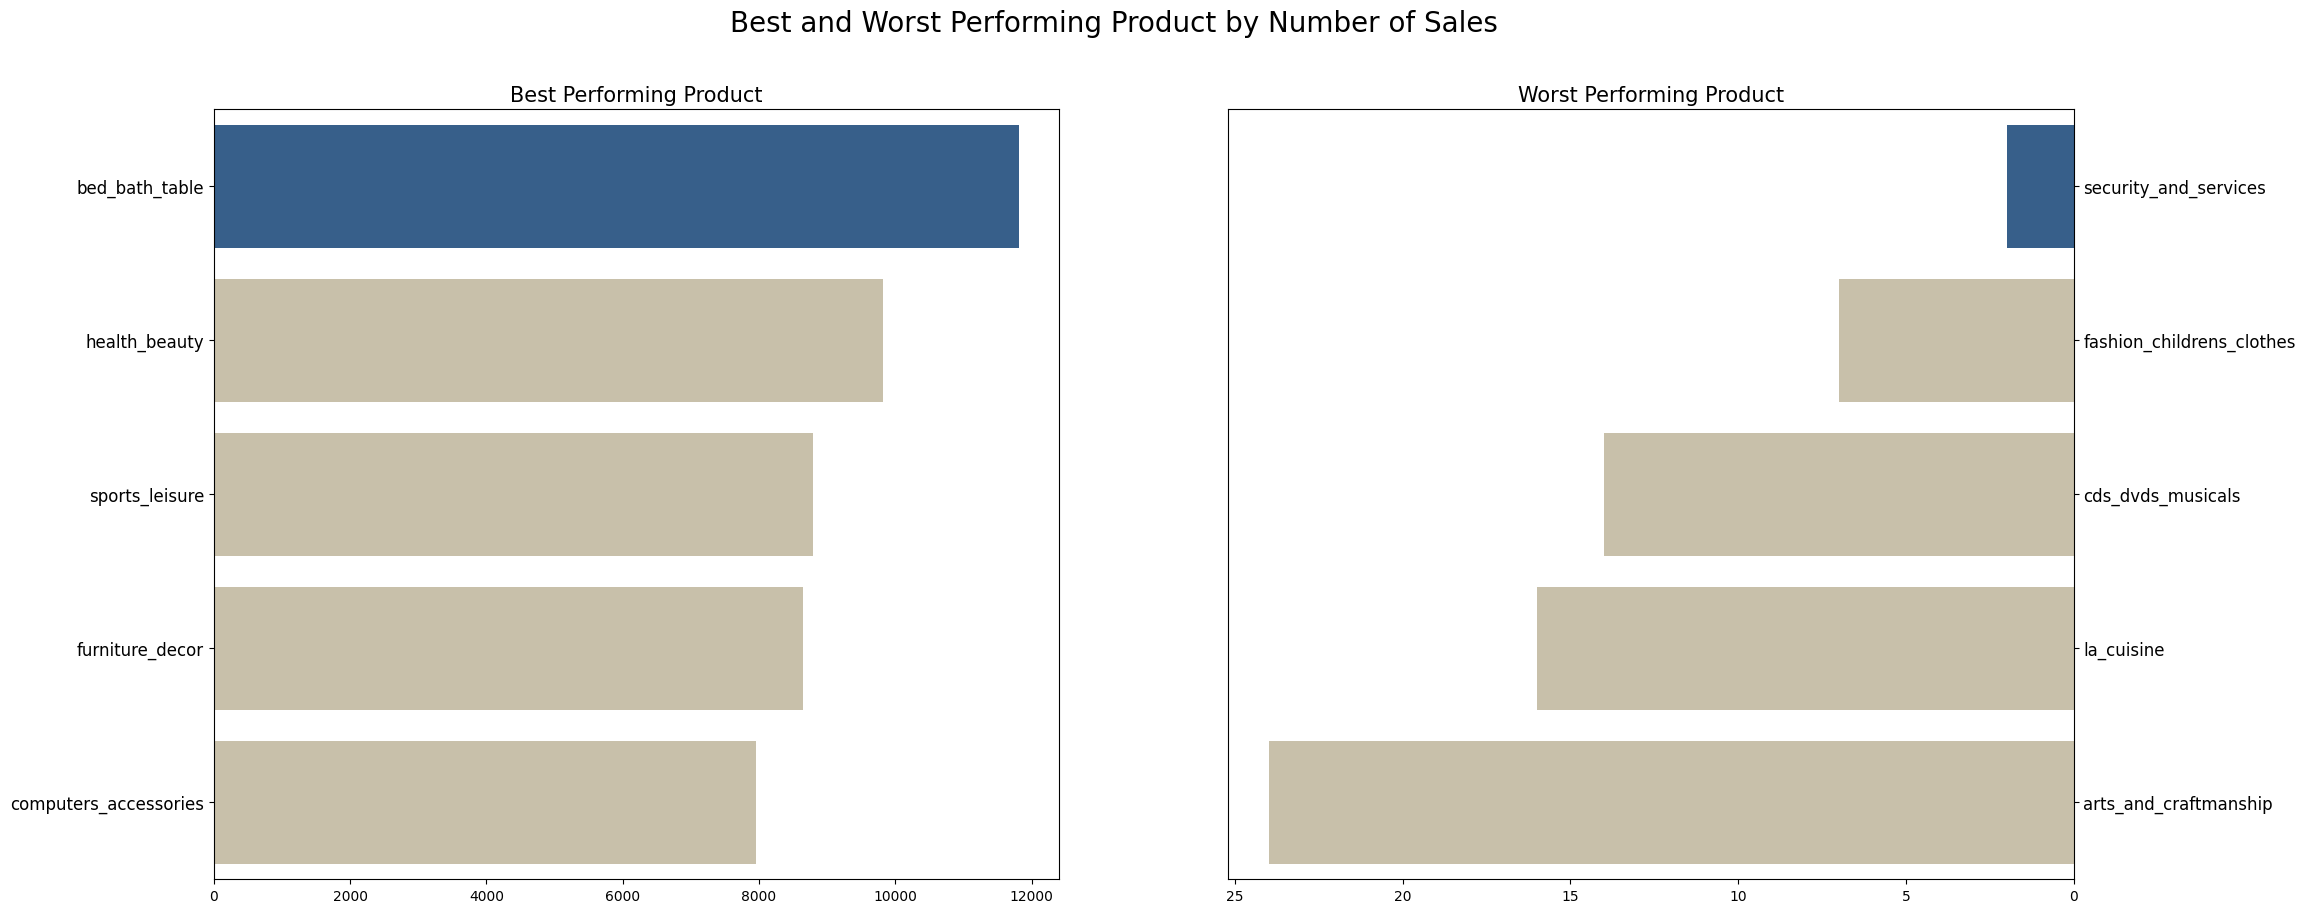

In [104]:
# We can visualize these two side by side

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))
 
colors = ["#295F98", "#CDC2A5", "#CDC2A5", "#CDC2A5", "#CDC2A5"]
 
sns.barplot(x="items_sold", y="category", hue="category", data=sum_items_orders_df.head(5), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="items_sold", y="category", hue="category", data=sum_items_orders_df.sort_values(by="items_sold", ascending=True).head(5), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### 2. Where do most customers come from?

In [88]:
other_state = data_dict['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state[other_state['count']>=2].shape

(8, 2)

In [89]:
max_state = data_dict['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [90]:
max_state.sample(5)

,geolocation_zip_code_prefix,geolocation_state
12976,63960,CE
8203,31535,MG
15099,75084,GO
16864,85936,PR
5185,13739,SP


In [91]:
geolocation_silver = data_dict['geolocation'].groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geolocation_silver = geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [92]:
geolocation_silver.sample(5)

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
24927,85862,foz do iguacu,PR,-25.487856,-54.524474
12715,29194,aracruz,ES,-19.816613,-40.277800
16222,45818,trancoso,BA,-16.591787,-39.100550
22025,74125,goiânia,GO,-16.682526,-49.276053
26926,94818,alvorada,RS,-30.004661,-51.060990


In [93]:
customers_silver = customers_df.merge(geolocation_silver,
                                      left_on='customer_zip_code_prefix',
                                      right_on='geolocation_zip_code_prefix',
                                      how='inner')

In [94]:
customers_silver.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
32602,ebf4a394f95a53cf104a110b3ec5ac28,c400e8b4b9b09c840845352f51bd9add,96030,pelotas,RS,26b47634ae036af085a067dddf95bd77,delivered,2018-04-23 15:41:37,2018-04-24 17:17:00,2018-04-26 12:25:00,...,106.90,f0d45a919c19e2baf255dcbf6626dc65,1.0,2018-05-13 00:00:00,2018-05-16 00:35:49,96030,pelotas,RS,-31.760716,-52.369672
119944,3c5de2876ef848c693b452c96cab5d13,e8ff60ffee5f05d8c6fa450165504054,85810,cascavel,PR,c812c0f1cdbb156865e2d5e0ee09ee5f,delivered,2017-03-06 14:33:25,2017-03-07 03:55:27,2017-03-08 13:21:02,...,60.95,f62709ef754361d3e7267c473b69a2d4,5.0,2017-03-14 00:00:00,2017-03-17 08:16:49,85810,cascavel,PR,-24.952206,-53.466463
52246,f6fd9b592eb988dc6701679bd0e7f3c1,075a5615f6bb67b7a4704a98e15d9c5c,18683,lencois paulista,SP,a657f4281fa25af13388496f1075850d,delivered,2018-08-06 17:46:41,2018-08-06 17:55:24,2018-08-07 14:53:00,...,53.38,d2df3a949133091fb26abad00f8a4ef3,5.0,2018-08-14 00:00:00,2018-08-17 18:56:21,18683,lencois paulista,SP,-22.602737,-48.807763
8717,004d41e9bf012c669db1a257888d85a2,5e35d686648f9f99fd1f90161d3db93c,66087,belem,PA,de339d3dab036509a47753ddb94f1d55,delivered,2017-07-14 11:00:15,2017-07-14 16:15:29,2017-07-19 19:36:56,...,307.24,7116ad252c735383081c3e63feaece9b,4.0,2017-08-12 00:00:00,2017-08-15 12:29:41,66087,belem,PA,-1.428875,-48.464434
60074,28730d4a6f55626291fef3337baa4398,dee6b8918a94b49f5461603abe94bfcd,8696,suzano,SP,a7400d3fec66a843cb54bd2396f75df2,delivered,2018-06-20 11:00:29,2018-06-20 11:26:11,2018-06-22 08:54:00,...,32.33,f87b7e2e4503b3e43eaa8b59417e9b27,5.0,2018-06-26 00:00:00,2018-07-02 23:52:53,8696,suzano,SP,-23.508608,-46.290925


In [95]:
# Making this a function for reusability purposes (checking)
def check_duplicate_in_columns(columns):
    for col_name, col_data in columns.items():
        duplicates_in_column = columns.duplicated(subset=[col_name]).sum()
        print(f"Number of duplicates in column '{col_name}': {duplicates_in_column}")

check_duplicate_in_columns(customers_silver)

Number of duplicates in column 'customer_id': 56624
Number of duplicates in column 'customer_unique_id': 59959
Number of duplicates in column 'customer_zip_code_prefix': 140950
Number of duplicates in column 'customer_city': 151713
Number of duplicates in column 'customer_state': 155760
Number of duplicates in column 'order_id': 59581
Number of duplicates in column 'order_status': 155785
Number of duplicates in column 'order_purchase_timestamp': 60099
Number of duplicates in column 'order_approved_at': 67745
Number of duplicates in column 'order_delivered_carrier_date': 75866
Number of duplicates in column 'order_delivered_customer_date': 60389
Number of duplicates in column 'order_estimated_delivery_date': 155341
Number of duplicates in column 'delivery_status': 155784
Number of duplicates in column 'payment_sequential': 155760
Number of duplicates in column 'payment_type': 155782
Number of duplicates in column 'payment_installments': 155762
Number of duplicates in column 'payment_val

In [96]:
customers_silver = customers_silver.drop_duplicates('order_id')

In [97]:
check_duplicate_in_columns(customers_silver)

Number of duplicates in column 'customer_id': 0
Number of duplicates in column 'customer_unique_id': 3110
Number of duplicates in column 'customer_zip_code_prefix': 81469
Number of duplicates in column 'customer_city': 92164
Number of duplicates in column 'customer_state': 96179
Number of duplicates in column 'order_id': 0
Number of duplicates in column 'order_status': 96204
Number of duplicates in column 'order_purchase_timestamp': 518
Number of duplicates in column 'order_approved_at': 8164
Number of duplicates in column 'order_delivered_carrier_date': 16285
Number of duplicates in column 'order_delivered_customer_date': 808
Number of duplicates in column 'order_estimated_delivery_date': 95760
Number of duplicates in column 'delivery_status': 96203
Number of duplicates in column 'payment_sequential': 96190
Number of duplicates in column 'payment_type': 96201
Number of duplicates in column 'payment_installments': 96181
Number of duplicates in column 'payment_value': 68624
Number of du

In [98]:
# Making this into a .csv for dashboard
customers_silver.to_csv("dashboard/geolocation.csv", index=False)

In [99]:
# Function for plotting customers location to Brazil map
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

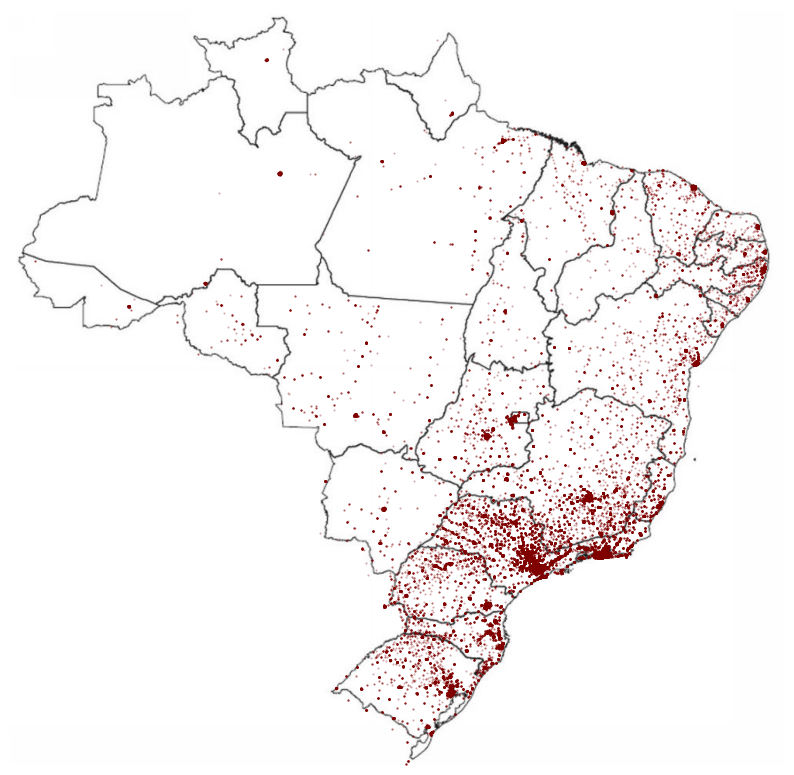

In [100]:
plot_brazil_map(customers_silver)

> We can see **most of our consumer comes from south-eastern and southern Brazil.** With some of them scattered in other areas in middle, 
> western and northern Brazil.

### 3. How are customer satifaction?

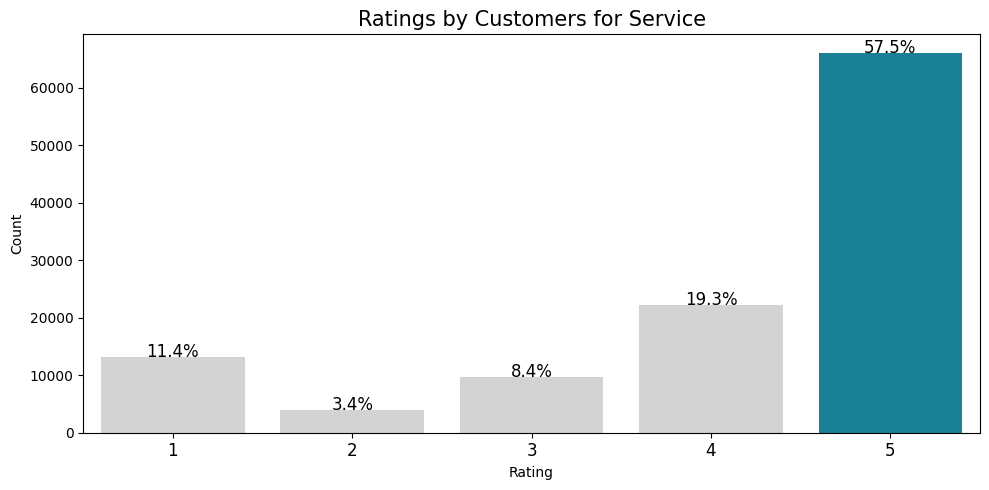

In [101]:
review_ratings = merged_df['review_score'].value_counts().reindex(range(1, 6), fill_value=0)
most_rating = review_ratings.idxmax()

review_ratings_percentage = (review_ratings / review_ratings.sum()) * 100

plt.figure(figsize=(10, 5))
sns.barplot(
    x=review_ratings.index,
    y=review_ratings.values,
    hue=review_ratings.index,  
    palette=["#068DA9" if score == most_rating else "#D3D3D3" for score in review_ratings.index],
    dodge=False  
)

for i, value in enumerate(review_ratings.values):
    percentage = f"{review_ratings_percentage[i+1]:.1f}%"  # i+1 to match rating scale 1-5
    plt.text(i, value + 0.5, percentage, ha='center', fontsize=12)

plt.legend([], [], frameon=False)

plt.title("Ratings by Customers for Service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)

plt.tight_layout()
plt.show()

> **We can see most of our ratings are highly positive (4 to 5) with almost 80% of the ratings. Meanwhile there are 15% on the negative
> side (1 to 2).**

### 4. How much does the average customer spend in each state?

In [102]:
# Merge datasets and calculate total spent by each customer
pay_ord_cust = orders.merge(payments, on='order_id', how='outer').merge(customers, on='customer_id', how='outer')
customer_spent = pay_ord_cust.groupby('customer_unique_id')['payment_value'].sum().sort_values(ascending=False)

# Calculate mean and standard error of the mean
customer_mean, customer_std = customer_spent.mean(), stats.sem(customer_spent)

customer_regions = pay_ord_cust.groupby('customer_state').agg(
    mean_spent=('payment_value', 'mean'),
    count=('customer_unique_id', 'count')
).reset_index()


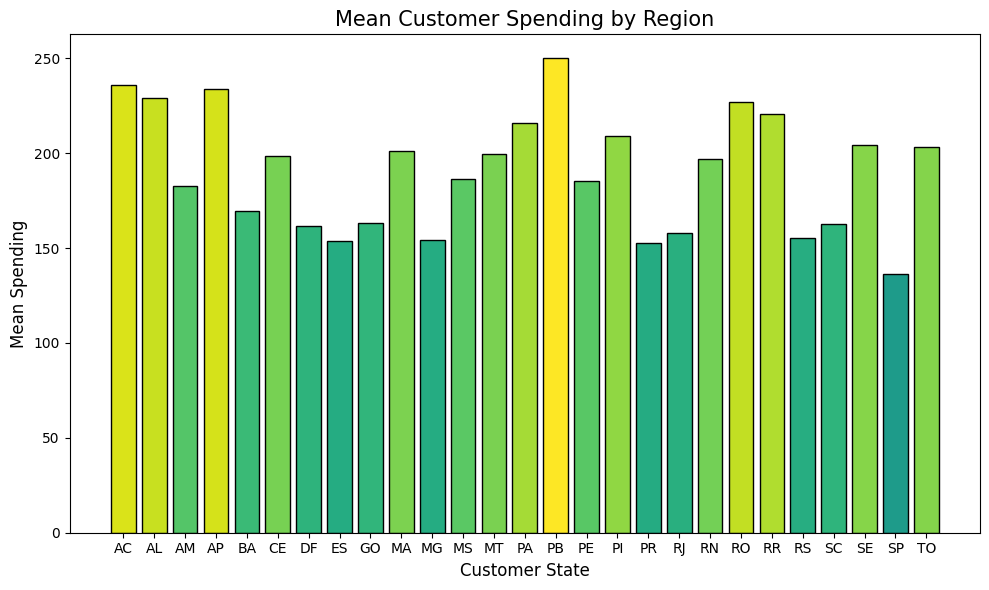

In [103]:
plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(customer_regions['mean_spent'] / max(customer_regions['mean_spent']))

plt.bar(customer_regions['customer_state'], customer_regions['mean_spent'], 
        color=colors, edgecolor='black')

plt.title('Mean Customer Spending by Region', fontsize=15)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Mean Spending', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

> **Although most of our customers are from São Paulo, the highest average spending customers are from Paraiba!**

## 4. Conclusion

**1. What are the best and least selling products?**

> Based on our analysis just now, we can conclude that our best selling items are bed_bath_table, and our worst selling items are 
> security_and_services. This can be a helpful insight to boost and drop the campaign on specific item category during a certain period of time.

**2. Where do most customers come from?**

> **Most of our consumer comes from south-eastern and southern Brazil** while some of them scattered in other areas in middle, western and
>  northern Brazil. This is factually correct since out most populated state 'SP' or São Paulo is located at south-eastern Brazil. This
> insight could be fruitful if we increase our area of operation closer to these populated spot.

**3. How are customer satifaction?**
> **From our visualization earlier, most of our ratings are highly positive (4 to 5) totalling almost 80% of the entire ratings. 
> Meanwhile there are 15% on the negative side (1 to 2).** This is considered good, but still 15% on the negative side meaning the entire 
> business operations have room for improvements.

**4. How much does the average customer spend in each state?**
> **Although most of our customers are from São Paulo, the highest average spending customers are from Paraiba!**
> This means that customers from Paraiba are high-spenders meanwhile those from São Paulo are the average-spenders, this insight could
> means that we can increase the quality of service in Paraiba and those less dense area, paying less attention to pricing and more to 
> quality can lead to higher revenue and customer reach!